<img src="./images/banner.png" width="800">

# The Perceptron and Basic Network Architecture

The perceptron is often seen as the **building block** of neural networks. Introduced in the late 1950s, it marked a major milestone in the field of machine learning. Although the perceptron itself is a relatively simple concept, its introduction helped spark the development of more complex and powerful models. In this section, we will explore the origins of the perceptron, the biological inspirations behind it, and its continued influence on modern machine learning.


<img src="./images/neuron-brain.webp" width="800">

The perceptron was proposed by **Frank Rosenblatt** in 1958 as an attempt to create a machine that could learn through iteration and corrective feedback. At the time, it generated both excitement and skepticism within the research community.
By the late 1960s, researchers began discovering the limitations of the perceptron—especially its inability to solve non-linearly separable problems (like the **XOR problem**). This led to a period often referred to as the “**AI Winter**,” where enthusiasm for neural networks waned.
However, the perceptron’s fundamental mechanism—adjusting weights based on errors—continues to be the core principle behind many advanced learning algorithms today.


<img src="./images/nn-history.jpg" width="800">

One of the reasons the perceptron gained attention was its **biological inspiration**. Researchers observed how neurons in the brain transmit signals and used this as a model for mathematical computation.
- A **neuron** in the brain receives signals from multiple sources (other neurons) and fires an output signal if those inputs meet a certain threshold.
- Similarly, a perceptron **sums weighted inputs** and applies an *activation* or threshold function to decide whether to produce an output of 1 or 0.


<img src="./images/neuron-ml.png" width="800">

❗️**Important Note:** While the perceptron is *loosely* based on biological neurons, it is a **highly simplified** model. Nevertheless, this connection sparked significant interest in studying how computers might mimic biological learning processes.


Despite its initial hurdles, the perceptron **paved the way** for more complex architectures. Researchers who continued exploring neural networks built on the perceptron to create what we now call **Multi-Layer Perceptrons (MLPs)** and eventually **Deep Neural Networks**.
Today, neural networks are at the forefront of **state-of-the-art** machine learning applications—from **image recognition** and **natural language processing** to **self-driving cars**.


💡**Tip:** Understanding the perceptron’s core principles—weighted inputs, threshold-based activation, and error-driven updates—will give you a solid foundation for learning more advanced neural network architectures in the future.

**Table of contents**<a id='toc0_'></a>    
- [Single-Layer Perceptron](#toc1_)    
  - [Model Overview](#toc1_1_)    
  - [Formulation and Activation Function](#toc1_2_)    
  - [The Perceptron Learning Rule](#toc1_3_)    
  - [Convergence Properties](#toc1_4_)    
- [Multi-Layer Perceptrons (MLPs)](#toc2_)    
  - [The Need for More Layers](#toc2_1_)    
  - [Hidden Layers and Non-Linear Activations](#toc2_2_)    
  - [Forward Pass (High-Level View)](#toc2_3_)    
  - [Real-World Example: The XOR Problem](#toc2_4_)    
- [Practical Considerations](#toc3_)    
  - [Common Challenges and Pitfalls](#toc3_1_)    
  - [Hyperparameter Tuning (An Overview)](#toc3_2_)    
  - [Tools and Libraries for Implementation](#toc3_3_)    
  - [Use Cases and Industry Applications](#toc3_4_)    
- [Summary](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Single-Layer Perceptron](#toc0_)

A **single-layer perceptron** is the simplest form of a neural network consisting of just one layer of output nodes. It takes an input vector, processes it through a weighted sum, then applies a binary activation function to produce a class label (e.g., 0 or 1). Although limited in its ability to handle complex datasets, the single-layer perceptron played a pivotal role in early machine learning research and laid the groundwork for more advanced models.


### <a id='toc1_1_'></a>[Model Overview](#toc0_)

A single-layer perceptron can be visualized as having:
- **Input nodes**: Each input $x_i$ corresponds to one feature in the dataset.  
- **Weights ($w_i$)**: Each input is multiplied by a corresponding weight.  
- **Bias ($b$)**: A constant term that helps shift the decision boundary.  
- **Output**: A single node that applies a threshold or *activation function* to decide whether the output is 1 or 0.


<img src="./images/single-layer-perceptron.png" width="800">

Intuitively, if the weighted sum of inputs is large enough to exceed a threshold, the perceptron outputs 1; otherwise, it outputs 0. This process mimics how a neuron fires an electrical signal if enough impulses are received.


### <a id='toc1_2_'></a>[Formulation and Activation Function](#toc0_)

Mathematically, the perceptron function can be written as:

$$
z = \mathbf{w}^T \mathbf{x} + b
$$


where:
- $\mathbf{w}$ is the **weight vector** $(w_1, w_2, \dots, w_n)$,  
- $\mathbf{x}$ is the **input vector** $(x_1, x_2, \dots, x_n)$,  
- $b$ is the **bias** term.


The output $y$ is then computed using a *step function*, often denoted $\phi(z)$:

$$
y = \phi(z) = 
\begin{cases} 
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
$$


This binary output makes the single-layer perceptron suitable for simple *linearly separable* classification problems—where a single line (in 2D) or hyperplane (in higher dimensions) can separate the two classes.


### <a id='toc1_3_'></a>[The Perceptron Learning Rule](#toc0_)

The perceptron learning algorithm is an **iterative** approach to adjust the weights and bias so that the model can correctly classify training samples. The learning rule is as follows:

1. **Initialize** the weight vector $\mathbf{w}$ (often with small random values) and set the bias $b$ to 0 (or a small value).
2. **For each training sample** $(\mathbf{x}^{(i)}, t^{(i)})$ where $t^{(i)}$ is the true label:
   - Compute the predicted output $\hat{y}^{(i)} = \phi(\mathbf{w}^T \mathbf{x}^{(i)} + b)$.
   - If there is an **error** (i.e., $\hat{y}^{(i)} \neq t^{(i)}$), update the weights and bias:
     $$
     \mathbf{w} \leftarrow \mathbf{w} + \eta \bigl(t^{(i)} - \hat{y}^{(i)}\bigr) \mathbf{x}^{(i)}
     $$
     $$
     b \leftarrow b + \eta \bigl(t^{(i)} - \hat{y}^{(i)}\bigr)
     $$
   - Here, $\eta$ is the **learning rate**, which controls how large the weight updates are.


💡 **Tip:** Choosing an appropriate learning rate is crucial. If $\eta$ is too large, the perceptron might fail to converge; if it’s too small, learning can be very slow.


Below is a pseudocode snippet illustrating the perceptron training loop:


```python
# Pseudocode for Perceptron
Initialize w randomly
Initialize b = 0
eta = 0.1  # Example learning rate

for epoch in range(max_epochs):
    for x, t in training_data:
        y_pred = step_function(w . x + b)
        error = t - y_pred

        # Update weights and bias if there is an error
        if error != 0:
            w = w + eta * error * x
            b = b + eta * error
```


### <a id='toc1_4_'></a>[Convergence Properties](#toc0_)

One of the classic results in machine learning is the **Perceptron Convergence Theorem**, which states that if the training data is *linearly separable*, the perceptron algorithm will find a separating hyperplane in a **finite** number of updates. However, if the data is **not** linearly separable, the algorithm can continue forever without finding a solution.


Despite this limitation, the perceptron groundbreaking concept—using an error-driven approach to iteratively refine weights—remains a core idea in more advanced neural network training algorithms. It laid the foundation for methods that address non-linearly separable problems, such as **multi-layer perceptrons** with **non-linear activations**, which we will explore next.

## <a id='toc2_'></a>[Multi-Layer Perceptrons (MLPs)](#toc0_)

Multi-Layer Perceptrons (MLPs) extend the fundamental idea of the single-layer perceptron by adding one or more **hidden layers** between the input and output. This additional depth enables the network to learn more **complex, non-linear** decision boundaries. MLPs are often considered the foundation of modern deep learning because they illustrate how stacking layers can increase representational capacity and solve tasks beyond the reach of a simple perceptron.


<img src="./images/single-multi-layer.png" width="600">

### <a id='toc2_1_'></a>[The Need for More Layers](#toc0_)


The single-layer perceptron demonstrated how weighted inputs and a threshold function can perform binary classification, but it **cannot** solve problems that are not linearly separable (e.g., the XOR problem).  
To address this limitation, researchers introduced **hidden layers**—intermediate layers of neurons that transform inputs into a space where non-linear patterns can become linearly separable in a higher-dimensional representation. By stacking these layers, MLPs gain the flexibility to approximate a wide variety of functions, allowing them to handle more complex tasks.


### <a id='toc2_2_'></a>[Hidden Layers and Non-Linear Activations](#toc0_)


An MLP typically consists of:
- **Input layer**: Takes in the feature vector.  
- **One or more hidden layers**: Perform **non-linear transformations** of the data.  
- **Output layer**: Produces the final prediction or output.  


Unlike the single-layer perceptron that uses a simple step function, MLPs employ **non-linear activation functions** such as:
- **Sigmoid** ($\sigma(z) = \frac{1}{1 + e^{-z}}$)  
- **Tanh** ($\tanh(z)$)  
- **ReLU** ($\text{ReLU}(z) = \max(0, z)$)


These activations allow MLPs to capture complex patterns. For instance, **ReLU** is widely used because of its simplicity and effectiveness in mitigating certain issues like vanishing gradients.  


❗️**Important Note:** The introduction of non-linear activations is what truly sets MLPs apart from single-layer perceptrons, enabling them to learn rich, non-linear representations of data.


### <a id='toc2_3_'></a>[Forward Pass (High-Level View)](#toc0_)


The teaching process of MLPs involves two main steps: **forward pass** and **backward pass**. Here’s a high-level overview of the forward pass:

1. **Weighted Sum**: Each neuron in the hidden layer computes a weighted sum of its inputs:
   $$
   z^{(l)} = W^{(l)} x^{(l-1)} + b^{(l)}
   $$
   - $W^{(l)}$ represents the weight matrix of layer $l$.
   - $b^{(l)}$ is the bias vector of layer $l$.
   - $x^{(l-1)}$ is the vector of activations from the previous layer (for the first hidden layer, this is just the input $\mathbf{x}$).

2. **Apply Activation**: After computing $z^{(l)}$, each neuron applies a non-linear activation function $\phi$:
   $$
   x^{(l)} = \phi\big(z^{(l)}\big)
   $$
   The resulting $x^{(l)}$ serves as the input to the next layer.

3. **Repeat**: This process continues through all hidden layers until we reach the **output layer**, which provides the final prediction (e.g., a class label or a continuous value).


<img src="./images/nn.gif" width="600">

Below is a simplified code snippet using **scikit-learn** to create a small MLP for binary classification:


In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

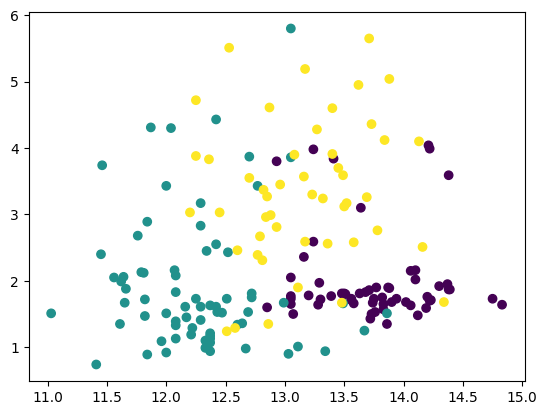

In [41]:
X, y = load_wine(return_X_y=True)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

In [29]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Create an MLP with a single hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [38]:
# Evaluate on the test set
accuracy = mlp.score(X_test, y_test)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.6944444444444444


💡**Tip:** Even this small MLP can learn non-linear decision boundaries, often outperforming a single-layer perceptron on more complex tasks.


### <a id='toc2_4_'></a>[Real-World Example: The XOR Problem](#toc0_)


The classic **XOR (exclusive OR)** function is a basic example that highlights the power of MLPs over single-layer perceptrons. In a 2D plane, there’s no single **linear boundary** that can classify XOR outputs correctly. However, if you add a hidden layer with **non-linear** activation functions:

1. The first layer can learn **intermediate features** that separate the XOR data in a higher-dimensional space.  
2. The second layer (output layer) can then **linearly** separate these transformed features.  


As a result, an MLP effectively solves what the single-layer perceptron could not. This demonstration was historically significant in proving the **importance of multi-layer architectures** and paving the way for deep neural networks used today.

## <a id='toc3_'></a>[Practical Considerations](#toc0_)

Building an effective neural network requires more than just understanding the core architecture. Real-world projects involve practical challenges related to data quality, computational constraints, and model complexity. In this section, we will explore common pitfalls when training Multi-Layer Perceptrons (MLPs), the basics of hyperparameter tuning, popular tools and libraries, and a glimpse of industry applications that leverage these networks.


### <a id='toc3_1_'></a>[Common Challenges and Pitfalls](#toc0_)


Developing a robust MLP can be tricky as several issues may arise during the training process. One frequent obstacle is **overfitting**, where the model memorizes training data but performs poorly on unseen data. Regularization techniques like **L2 regularization**, **dropout**, and **early stopping** can mitigate this.
Another pitfall is the **vanishing or exploding gradient** problem, especially with deeper networks and certain activation functions. Proper weight initialization and the use of activation functions like **ReLU** can help alleviate this issue. Finally, **imbalanced datasets** can also hinder performance; strategies such as **oversampling** the minority class or using appropriate metrics (like **F1-score** or **ROC AUC**) are essential in such cases.


### <a id='toc3_2_'></a>[Hyperparameter Tuning (An Overview)](#toc0_)


Hyperparameters are **user-defined** settings that affect how the network learns. They include choices like the **learning rate ($\eta$)**, number of **hidden layers**, number of **neurons per layer**, **batch size**, and more.
Choosing the right hyperparameters can significantly impact the model’s accuracy and convergence speed. A common approach is to use **grid search** or **random search** over a specified range of values and select the combination that yields the best validation performance.

❗️**Important Note:** More advanced methods like **Bayesian optimization** or **automated hyperparameter tuning** tools can systematically search the hyperparameter space, saving time and computational resources.


<img src="./images/hyperparameter-tuning.jpg" width="600">

<img src="./images/hyperparameter-tuning-2.png" width="600">

Below is an example of how you might perform hyperparameter tuning for an MLP classifier using the Wine dataset in scikit-learn. This snippet demonstrates a simple grid search across various hyperparameters to find the best-performing model.

In [43]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier

In [44]:
# 1. Load the dataset
data = load_wine()
X = data.data
y = data.target

In [45]:
# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
# 3. Define the MLP model
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

In [47]:
# 4. Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],  # L2 regularization term
    'learning_rate_init': [0.001, 0.01]
}

In [48]:
# 5. Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=mlp_model, 
    param_grid=param_grid, 
    cv=3,              # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1          # Use all available CPU cores
)

In [49]:
# 6. Run the grid search
grid_search.fit(X_train, y_train)

/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't conv

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [50]:
# 7. Print out the best parameters and cross-validation score
print("Best hyperparameters found:")
print(grid_search.best_params_)
print("\nBest cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))


Best hyperparameters found:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'adam'}

Best cross-validation accuracy: 95.07%


In [51]:
# 8. Evaluate on the test set
best_mlp = grid_search.best_estimator_
test_accuracy = best_mlp.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(test_accuracy * 100))

Test set accuracy: 97.22%


Explanation of key steps:
- We first split the Wine dataset into training and test sets using train_test_split.  
- The MLPClassifier is initialized with a maximum of 1000 iterations.  
- We define a parameter grid (param_grid) specifying possible values for hyperparameters like hidden_layer_sizes, activation, solver, alpha (regularization strength), and learning_rate_init.  
- We use GridSearchCV for an exhaustive search over the parameter grid, with 3-fold cross-validation.  
- Once training completes, we fetch the best parameters via grid_search.best_params_ and create the best estimator to evaluate on our test data.


This basic trial demonstrates the workflow of identifying and tuning the hyperparameters that can best suit your dataset.

### <a id='toc3_3_'></a>[Tools and Libraries for Implementation](#toc0_)


These days, practitioners don’t have to code MLPs from scratch—several **high-level libraries** make building neural networks convenient and efficient:
1. **TensorFlow/Keras**: Offers a user-friendly API and a large ecosystem of community support.
2. **PyTorch**: Popular for its **dynamic computation graph**, making it flexible for research.
3. **scikit-learn**: Provides simple yet powerful classes like `MLPClassifier` and `MLPRegressor` for straightforward use-cases.
In practice, these tools handle many complexities like **optimized matrix operations**, **automatic differentiation**, and **GPU support**, enabling experiments with different architectures more rapidly.


### <a id='toc3_4_'></a>[Use Cases and Industry Applications](#toc0_)


MLPs are versatile and find applications across various industries. A classic application is **banking**, where MLPs gauge user creditworthiness or detect fraudulent transactions. In **healthcare**, neural networks help predict diseases or read medical images. **Manufacturing** lines employ MLPs for **quality control** and predictive maintenance, catching defects or machine failures before they become critical.
💡**Tip:** Even though more specialized architectures like **Convolutional Neural Networks (CNNs)** or **Recurrent Neural Networks (RNNs)** might provide better performance for image or time-series tasks, understanding basic MLPs lays an essential foundation for diving into those advanced models.

## <a id='toc4_'></a>[Summary](#toc0_)

The perceptron and multi-layer perceptrons (MLPs) are foundational concepts in neural networks. By understanding how neurons combine inputs, apply non-linear activation, and share weights, you gain insight into the fundamental mechanisms powering modern machine learning models. Throughout this lecture, we explored how MLPs improve upon single-layer perceptrons to capture non-linear patterns, handle more complex tasks, and ultimately prepare you for deeper explorations in neural network architectures.


An essential realization from this lecture is that **adding hidden layers** and **non-linear activation functions** unlocks the power to solve tasks a single-layer perceptron cannot handle, such as the XOR problem. Understanding the **forward pass** and **perceptron learning rule** serves as the conceptual backbone for grasping more advanced training algorithms like **backpropagation**.
Additionally, we highlighted **practical considerations** including overfitting, hyperparameter tuning, and the role of modern machine learning libraries. Keeping these in mind helps ensure you build models that not only learn but also **generalize** to new data.


- **“Neural Networks and Deep Learning” by Michael Nielsen** – A free online book providing an intuitive explanation of core neural network concepts.
- **“Pattern Recognition and Machine Learning” by Christopher Bishop** – A more advanced text on ML algorithms, including deeper statistical insights.
- **Online Communities** – Engaging platforms such as **Kaggle**, **Stack Overflow**, and relevant **Reddit** communities can offer valuable peer support and practical tips.


❗️**Important Note:** Always seek reputable sources and hands-on practice to deepen your understanding. Experimenting with datasets and participating in machine learning competitions can be a great way to learn by doing.


Multi-layer perceptrons build the conceptual framework for **deep learning**, where multiple hidden layers stack to form deep neural networks. Later chapters or dedicated courses typically dive into topics like **backpropagation in detail**, **convolutional layers**, **recurrent layers**, and more advanced architectures suited for images, text, or sequential data.
If you find yourself fascinated by these concepts, the next steps involve learning about **advanced optimizers**, **regularization techniques**, and specialized network builds (e.g., **CNNs for computer vision**, **RNNs for sequence modeling**, and **transformers** for language tasks). As you explore, you will discover how the building blocks introduced in this lecture carry over to state-of-the-art models used in cutting-edge machine learning applications.